In [52]:
from Scripts import profiling as pf, preprocessing as prep, loading as dl
import pandas as pd

In [53]:
schema_input = '../Data/schema_phone.pkl'
df = pd.read_pickle(schema_input)

In [56]:
df = df[['REVIEWBODY','REVIEWRATING_adj']]
df.columns=['text', 'label']
df.head()

,text,label
56,"""Got this for my girl friend as she always use...",5.0
184,"""Huawei Nova 3i in the price range comes with ...",4.0
468,"""A larger version of the company's flagship Mi...",5.0
509,"""As expected, HTC is back with some new smartp...",4.0
588,"""Samsung has updated it\u2019s A series phones...",4.0


In [57]:
pf.get_review_count(df)


Amount of reviews:  22566


In [26]:
df.REVIEWBODY = prep.preprocess_reviews(df.REVIEWBODY)

In [58]:
pf.create_word_count(df)

C:\Users\D064966\PycharmProjects\Master\Scripts\profiling.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df.text.apply(lambda x: len(str(x).split(" ")))


,text,label,word_count
56,"""Got this for my girl friend as she always use...",5.0,67
184,"""Huawei Nova 3i in the price range comes with ...",4.0,32
468,"""A larger version of the company's flagship Mi...",5.0,1273
509,"""As expected, HTC is back with some new smartp...",4.0,1594
588,"""Samsung has updated it\u2019s A series phones...",4.0,1374
...,...,...,...
809932,The Good: The iPhone 7 still has the biggest k...,4.0,2364
809933,The Good: Dual rear cameras delivers true 2x o...,4.0,1115
809934,"The Good: Improved speed, better cameras, alwa...",4.0,1001
809935,"The Good: A small, hand-friendly design. Solid...",4.0,504


In [61]:
pf.get_longest_review(df)

The longest review text in our sample has 16108 words.
Longest review text:

96957    "\n             \n\n\n{\n    \"@context\":\"ht...
Name: text, dtype: object 96957    4.0
Name: label, dtype: float64


In [62]:
pf.get_shortest_review(df)

The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 34 times.
115486                                        "aryanprince"
115494                                    "Hilarious.lol.!"
197219                    "scriptwindow.alert(test)/script"
240411                                   "I,LOVE.YES.JESUS"
268728                                         "Blackberry"
308163                                                 "OK"
339106                                         "Exercising"
344655                                           "Conforme"
376518                                "very.nice.song.."@vi
382245    "phoneky.com/mp3-ringtones/?pview-item&amp;idm...
384778                                  "very.beautiful"@vi
408873                                         "Actiongame"
433414    "phoneky.com/mp3-ringtones/?pview-item&amp;idm...
445075                                        "Perfect!"@nl
450000                                   

In [74]:
df[df.word_count<10]['label'].value_counts() # for later trimming, reviews have to be long enough

5.0    1647
4.0     157
2.0      75
3.0      50
1.0      13
Name: label, dtype: int64

In [81]:
df[df.word_count==2]

,text,label,word_count
1373,"""Poor instructions""@en",3.0,2
12691,"""Prima ware""",5.0,2
17039,"""Un ref\u00E9rence""@fr",4.0,2
39377,"""Perfect """,4.0,2
44507,"""Universally useful.""",5.0,2
...,...,...,...
801062,"""Good morning""",5.0,2
801463,"""hellow everyone""",5.0,2
802569,"""Super browser""",5.0,2
803241,"""world no.1""",5.0,2


In [ ]:
df[df.word_count>1000]['label'].value_counts() # for later trimming, reviews have to be long enough

Text(0.5, 1.0, 'Text lengths in words (Schema_CellPhone)')

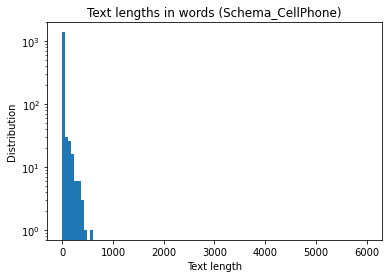

In [78]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
plt.hist(df['word_count'].value_counts().sort_index(), range=(0, 6000), bins=100, log=True)
plt.xlabel('Text length')
plt.ylabel('Distribution')
plt.title(f'Text lengths in words (Schema_CellPhone)')

In [80]:
df.word_count.value_counts()
df.word_count.describe()

count    22566.000000
mean       176.114110
std        366.080395
min          1.000000
25%         32.000000
50%         55.000000
75%        139.000000
max      16108.000000
Name: word_count, dtype: float64

In [49]:
df.REVIEWRATING_adj.value_counts()



5.0    16982
4.0     4146
3.0      953
1.0      243
2.0      242
Name: REVIEWRATING_adj, dtype: int64